In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow as tf

2024-04-16 14:19:23.449212: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = 'j32xdt2ff5-2/tea sickness dataset/'
print(os.listdir(path))

['white spot', 'Anthracnose', '.DS_Store', 'healthy', 'gray light', 'bird eye spot', 'algal leaf', 'brown blight', 'red leaf spot']


In [60]:
image_size=224
batch_size=128 
channels=3
epochs=20

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    path,
    seed=123,
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 885 files belonging to 8 classes.


In [8]:
class_names = dataset.class_names
class_names

['Anthracnose',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(128, 224, 224, 3)
[1 3 5 1 0 0 1 5 3 7 6 2 7 7 0 6 3 1 3 7 2 2 6 1 5 7 6 5 7 5 7 7 6 0 7 3 6
 6 4 4 2 6 2 4 4 1 2 2 1 3 3 1 1 0 7 7 6 5 5 6 2 4 6 0 4 6 4 0 1 6 0 5 5 4
 2 3 6 5 3 1 5 4 7 6 6 7 0 2 6 1 0 6 6 6 4 4 1 1 2 3 6 3 4 0 6 1 0 7 1 4 6
 2 2 2 1 1 6 7 3 2 4 1 2 2 6 4 7 1]


2024-04-16 14:36:48.460087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-16 14:38:45.142426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


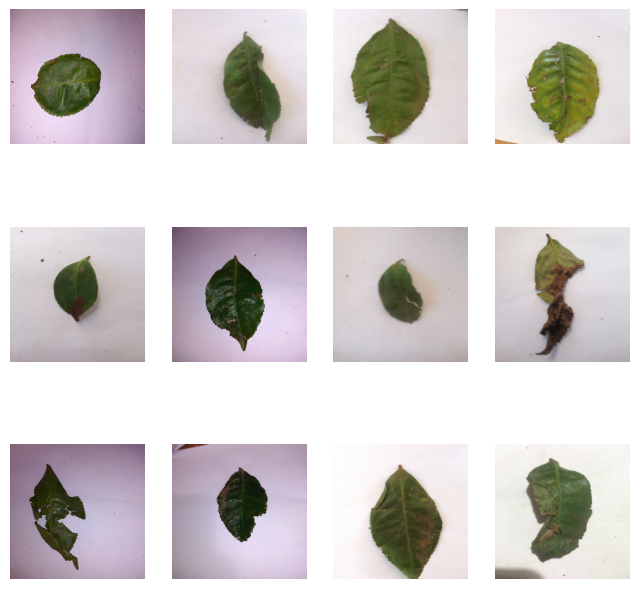

In [15]:
plt.figure(figsize=(8, 8))
for image_batch, label_batch in dataset.take(4):
    for i in range(12):
        ax=plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis('off')

2024-04-16 14:41:22.551422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


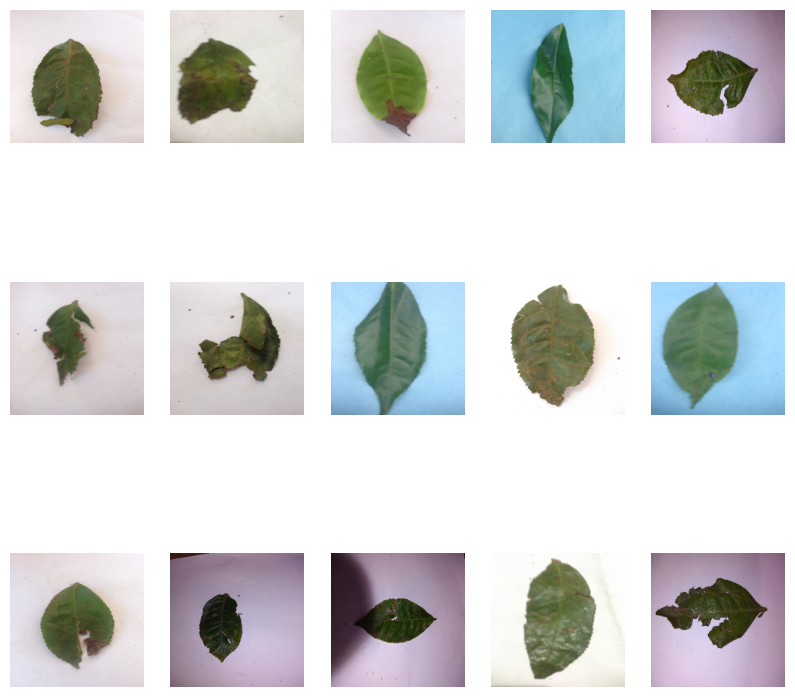

In [19]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(5):
    for i in range(15):
        ax=plt.subplot(3, 5, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis('off')

In [33]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [37]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
len(train_ds)

5

In [39]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [41]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(image_size, image_size),
    tf.keras.layers.Rescaling(0.2)
])

In [49]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical",input_shape=(image_size, image_size,3)),
    tf.keras.layers.RandomRotation(0.2)
])
data_augmentation

<Sequential name=sequential_3, built=True>

In [50]:
from tensorflow.keras import models, layers

In [51]:
input_shape= (bacth_size, image_size, image_size, channels)
n_classes = 8

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(n_classes)
])

In [56]:

model.build(input_shape=input_shape)

In [57]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (128, 224, 224, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (128, 224, 224, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (128, 224, 224, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (128, 112, 112, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (128, 112, 112, 16)    │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (128, 56, 56, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (128, 56, 56, 32)      │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (128, 28, 28, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (128, 25088)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (128, 32)              │       802,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (128, 32)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (128, 32)              │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (128, 32)              │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (128, 32)              │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (128, 8)               │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 811,832 (3.10 MB)

 Trainable params: 811,704 (3.10 MB)

 Non-trainable params: 128 (512.00 B)

In [58]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
)

In [61]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=test_ds,
    verbose=1,
    epochs=epochs,
);

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.1210 - loss: 2.5852 - val_accuracy: 0.1641 - val_loss: 7.5403
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.1836 - loss: 2.2893 - val_accuracy: 0.2109 - val_loss: 5.1041
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.2280 - loss: 2.1884 - val_accuracy: 0.3398 - val_loss: 2.3333
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2496 - loss: 2.0623 - val_accuracy: 0.3555 - val_loss: 2.0066
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2416 - loss: 2.0134 - val_accuracy: 0.3047 - val_loss: 1.9339
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.3108 - loss: 1.8375 - val_accuracy: 0.3477 - val_loss: 1.9849
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3090 - loss: 1.8352 - val_accuracy: 0.3047 - val_loss: 1.9025
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3150 - loss: 1.7234 - val_accuracy: 0.3555 - val_loss: 1.8979
Epoch 9/2

In [62]:
model1 = Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(n_classes)
])

model1.build(input_shape=input_shape)
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (128, 224, 224, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (128, 224, 224, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (128, 224, 224, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (128, 112, 112, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (128, 112, 112, 16)    │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (128, 56, 56, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (128, 56, 56, 32)      │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (128, 28, 28, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (128, 25088)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (128, 32)              │       802,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (128, 32)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (128, 32)              │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (128, 32)              │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (128, 32)              │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (128, 8)               │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 811,832 (3.10 MB)

 Trainable params: 811,704 (3.10 MB)

 Non-trainable params: 128 (512.00 B)

In [63]:
model1.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
)

In [65]:
epochs = 50
history = model1.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=test_ds,
    verbose=1,
    epochs=epochs,
);

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6337 - loss: 0.9804 - val_accuracy: 0.5781 - val_loss: 1.0841
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5982 - loss: 1.0098 - val_accuracy: 0.6016 - val_loss: 1.0571
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6342 - loss: 0.9407 - val_accuracy: 0.5742 - val_loss: 1.1194
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6238 - loss: 0.9698 - val_accuracy: 0.5352 - val_loss: 1.0786
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6618 - loss: 0.9216 - val_accuracy: 0.6797 - val_loss: 1.0117
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6539 - loss: 0.9008 - val_accuracy: 0.6133 - val_loss: 1.0376
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6778 - loss: 0.8786 - val_accuracy: 0.5352 - val_loss: 1.1544
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6746 - loss: 0.9398 - val_accuracy: 0.5898 - val_loss: 1.0795
Epoch 9/5

In [66]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


2024-04-16 15:41:13.622081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


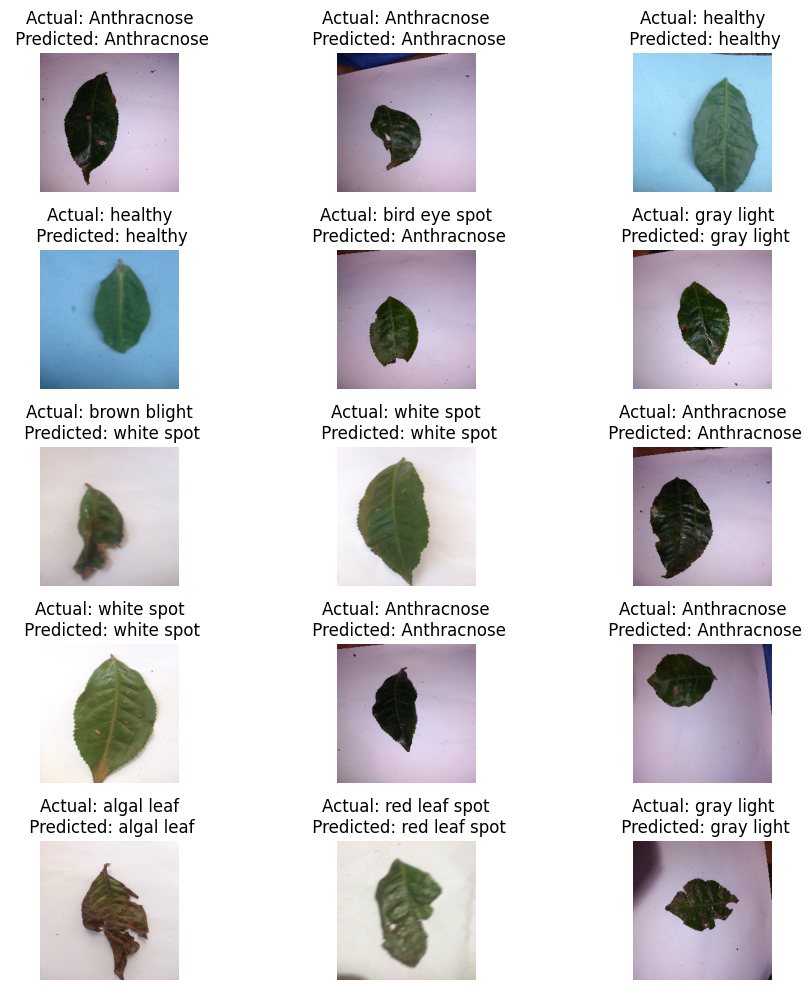

In [70]:
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):
    for i in range(15):
        ax=plt.subplot(5,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class = predict(model1, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}")
        plt.axis("off")

        # Adjust spacing between subplots to prevent overlap
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

2024-04-16 15:43:35.025306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


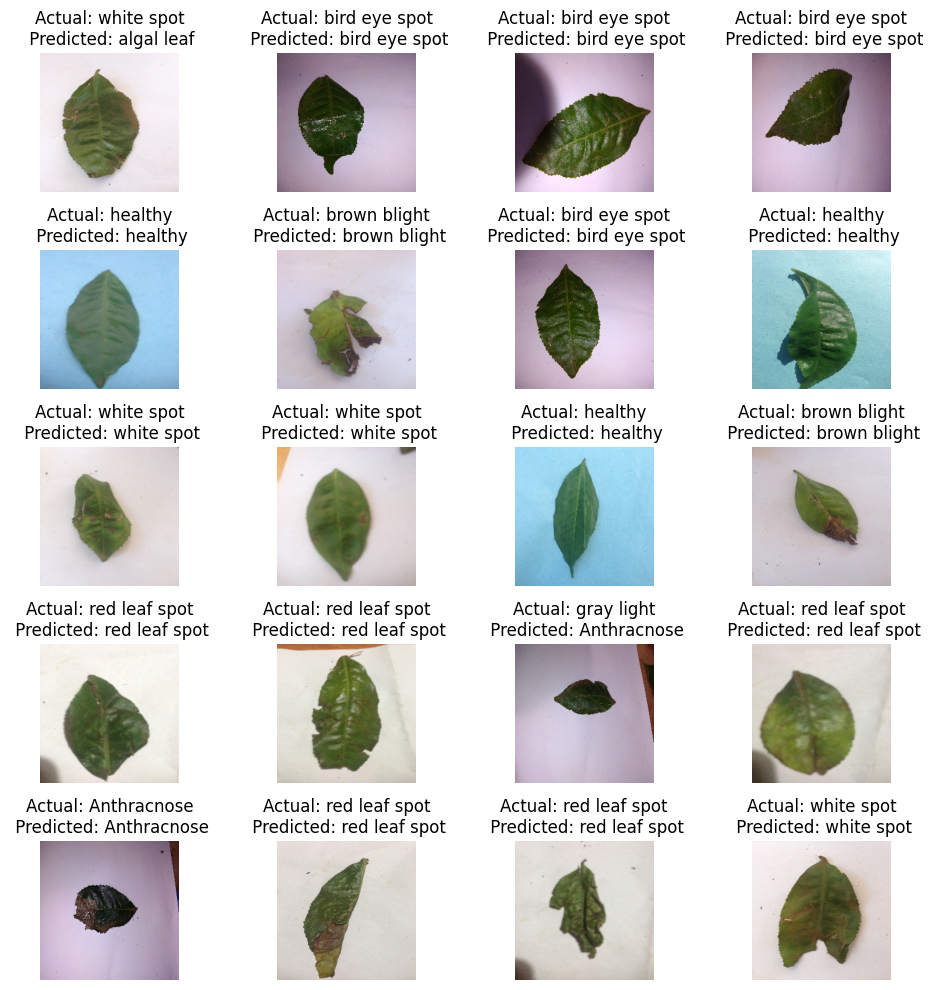

In [73]:
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(3):
    for i in range(20):
        ax=plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class = predict(model1, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}")
        plt.axis("off")

        # Adjust spacing between subplots to prevent overlap
plt.tight_layout()
plt.show()